<a href="https://colab.research.google.com/github/VladGrigoras/CNS/blob/main/CNS_Lab4_NeuralCoding_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set()

# global defaults for plots - optional
sns.set_theme(style="ticks",
              palette="colorblind",
              font_scale=1.7,
              rc={
              "axes.spines.right": False,
              "axes.spines.top": False,
          },
          )

# Neural Coding





## Introduction 

In this lab we focus on population coding, decoding and Fisher information. We investigate how well a stimulus can be decoded from the response of one (or multiple) neurons, how the Fisher information can be used to quantify decoder performance, and when Fisher information fails to capture the behaviour of simple decoders.

## Maximum Likelihood for Poisson Neurons

We first consider how the response of a single neuron can be used to decode a stimulus that the neuron is tuned to, and how decoding from multiple neurons can improve decoding performance.

Consider a neuron with response $p(n|s) = Poiss(f(s)T) = (f(s)T)^ne^{-f(s)T}/n!$ where $f(s) = r_{max}e^{-(s-s_{pref})^2/(2 \sigma_f^2)}$. Set $r_{max} = 20 Hz$, $T=1 s$, and $\sigma_f = 20^\circ$, with $s\in\left[-180^\circ, 180^\circ\right)$

* Plot the likelihood function $p(n|s)$ for a neuron with $s_{pref}=0^\circ$ for measured responses $n\in\left\{0, 1, ..., 40\right\}$. What do you observe? How do you interpret this?
* Derive the stimulus values $s^*$ for which the (log) likelihood is extremised for a given $n$. How does this compare to your numerical results? What are the values $\hat{s}_{ML}$ at which the likelihood is maximised?
* An alternative way to decode is maximum a posteriori, which introduces a prior over the stimulus $p(s)$ and defines $p(s|n) = p(n|s) p(s)/p(n)$. How might the introduction of a prior influence decoded stimulus in this case?
* Consider two independent neurons with overlapping tuning curves with $s_{pref}^{(1)} = -5^\circ$ and $s_{pref}^{(2)} = 5^\circ$. How would you expect the likelihood function to change when decoding from both neurons simultaneously? Plot the likelihood $p(\mathbf{n}|s) = p(n_1|s) p(n_2|s)$ to verify your prediction. Try varying $n_1$ and $n_2$ to see how the likelihood function varies.



## Solution



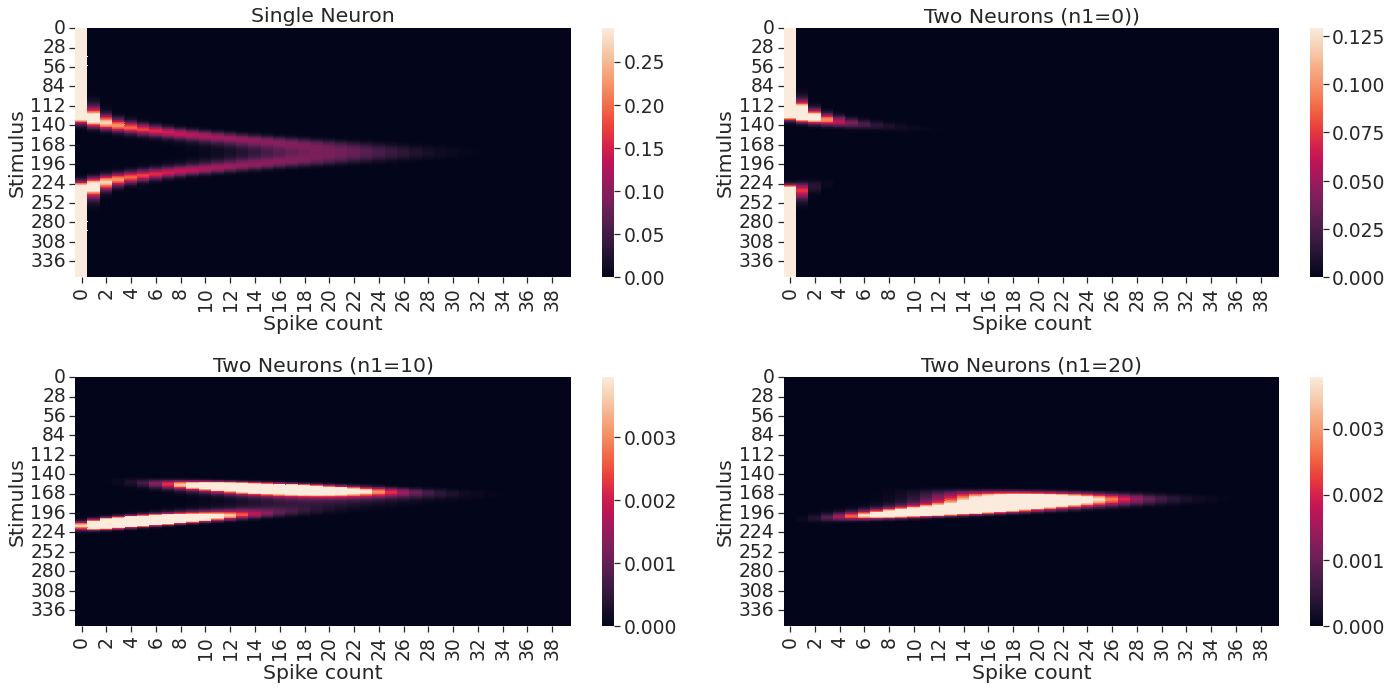

In [ ]:
rmax = 20;
sigmaf = 20;
spref = 0;
s=np.arange(-180, 180, 1)
T = 1;
Nn = 2*rmax;

f = rmax * np.exp(-(s-spref)**2/(2*sigmaf**2));
likelihood_Poiss_1neuron = np.zeros([len(s),Nn])

for n in range(Nn): 
      likelihood_Poiss_1neuron[:,n] = (f*T)**n * np.exp(-f*T) / np.math.factorial(n)


spref1 = -5
spref2 = 5
f1 = rmax * np.exp(-(s-spref1)**2/(2*sigmaf**2))
f2 = rmax * np.exp(-(s-spref2)**2/(2*sigmaf**2))
likelihood_Poiss_2neurons = np.zeros([len(s),Nn, Nn])

for n1 in range(Nn): 
      l1 = (f1*T)**n1 * np.exp(-f1*T) / np.math.factorial(n1)           
      for n2 in range(Nn):
          l2 = (f2*T)**n2 * np.exp(-f2*T) / np.math.factorial(n2);
          likelihood_Poiss_2neurons[:,n1,n2] =  l1 * l2 


fig, ax = plt.subplots(2,2,  figsize = (20,10))
sns.heatmap(likelihood_Poiss_1neuron, robust=True, ax = ax[0,0])
ax[0,0].set_yticklabels(ax[0,0].get_yticklabels(), rotation=0)
ax[0,0].set_title('Single Neuron')
ax[0,0].set_xlabel('Spike count')
ax[0,0].set_ylabel('Stimulus')

sns.heatmap(likelihood_Poiss_2neurons[:,:,0], robust=True, ax = ax[0,1])
ax[0,1].set_yticklabels(ax[0,1].get_yticklabels(), rotation=0)
ax[0,1].set_title('Two Neurons (n1=0))')
ax[0,1].set_xlabel('Spike count')
ax[0,1].set_ylabel('Stimulus')

sns.heatmap(likelihood_Poiss_2neurons[:,:,10], robust=True, ax = ax[1,0])
ax[1,0].set_yticklabels(ax[1,0].get_yticklabels(), rotation=0)
ax[1,0].set_title('Two Neurons (n1=10)')
ax[1,0].set_xlabel('Spike count')
ax[1,0].set_ylabel('Stimulus')

sns.heatmap(likelihood_Poiss_2neurons[:,:,20], robust=True, ax = ax[1,1])
ax[1,1].set_yticklabels(ax[1,1].get_yticklabels(), rotation=0)
ax[1,1].set_title('Two Neurons (n1=20)')
ax[1,1].set_xlabel('Spike count')
ax[1,1].set_ylabel('Stimulus')

plt.tight_layout()


The likelihood for one neuron shows that two stimuli are equally likely when $n$ is below a certain threshold. This is due to the symmetry of the tuning curve, as stimuli on either side of the peak would elicit an identical response and so cannot be distinguished. When the response $n$ becomes sufficiently large, the likelihood has a single peak centered on the neuron's preferred stimulus. We can derive three local extrema as follows:

$$ \log p(n|s) = n \log Tf(s) - T f(s) - \log n!$$ 
$$\frac{d\log p(n|s)}{ds} = \frac{n f'(s)}{f(s)} - Tf'(s) = 0$$
$$f'(s) = - \frac{s-s_{pref}}{\sigma_f^2} f(s) $$
$$(n- Tf(s)) f'(s) = 0 \implies (s-s_{pref}) (n-Tf(s)) = 0$$

This gives three stationary points: 1) $s=s_{pref}$ 2-3) $n= Tf(s) \implies s = s_{pref} \pm \sqrt{2\sigma_f^2(\log T r_{max} - \log n)} $. When $n > Tr_{max}$, no real root exists for the two extrema flanking the tuning curve, in which case the neuron's preferred stimulus becomes the likeliest. This makes sense - if the neuron fires more strongly than the peak firing rate $f(s_{pref})$, it is more likely that the preferred stimulus drove the neuron, while if the neuron fires less strongly than $f(s_{pref})$ then two stimuli are equally likely (one on each flank).

Introducing a prior $p(s)$ could have interesting effects on the decoder: 1) a prior which is asymmetric about the tuning curve centre would cause one of the two equally likely stimuli flanking the tuning curve centre to become more probable than the other 2) a prior which is symmetric about the tuning curve centre could switch the probability function between the single peak and double peak regimes.

Introducing a second neuron has a similar effect to introducing an asymmetric prior. If both neurons respond with a different spike count, the symmetry is broken and one stimulus becomes more likely than the other. If both neurons respond with identical spike count then multiple maxima can still occur (but of course this is now less likely to occur, and adding more neurons would eventually cause this to be very rare).

# Estimators and Fisher Information

Fisher information quantifies the performance of an optimal unbiased estimator of the stimulus $s$ from the response $n$. 

* Simulate multiple trials of the single neuron discussed above in response to the stimulus $s=0$ (use np.random.poisson). As we investigated above, you will find that in many cases two stimuli are equally likely - to handle such cases, try two decoding strategies, one in which you pick one of the two most likely stimuli at random with probability $p=0.5$, and another in which you always pick the stimulus to the left of the tuning curve. Compute the bias $b(s) = \langle \hat{s} - s \rangle$, variance $var(s) = \langle (\hat{s} - \langle \hat{s}\rangle )^2 \rangle$, and mean squared error  $MSE(s) = \langle (\hat{s} -  s )^2 \rangle$ for each decoder (averages are with respect to $p(n|s)$ for fixed $s$). How do these quantities differ between the two decoders? [Hint: simulating the decoder and performing maximum likelihood numerically is prone to numerical precision errors - it is much simpler to use the analytical results derived in the previous section to find the decoded stimuli $\hat{s}(n)$].
* The Fisher information is defined as $I_F(s) = -\langle \frac{\partial^2 \log p(n|s)}{\partial s^2}\rangle$. The Cramer-Rao bound states that $var(s) \ge 1/I_F(s)$ for any *unbiased* estimator. Derive an expression for the Fisher information for the one and two neuron cases considered above. 
* Simulate and plot the bias, variance, and MSE of the two decoders as a function of the presented stimulus $s$, and compare to a plot of the Fisher information. Where is the variance, bias, and MSE of each decoder minimised? How does this align with the maxima and minima of the Fisher information?
* For the single-neuron case, the Fisher information is zero for stimuli presented at the tuning curve centre ($I_F(0) = 0$), which by the Cramer-Rao bound suggests that the variance of an unbiased estimator should be infinite. But our simulations show that this is not the case. Why does the Cramer-Rao lower bound not hold for our decoders?
* The Cramer Rao bound can be generalised to the case of a biased estimator as $MSE(s) \ge \frac{[1+b'(s)]^2}{I_F(s)} + b^2(s)$. Compute this lower bound for each decoder and plot against their respective MSEs. Do your decoders satisfy this lower bound? [Hint: You will need to compute $b'(s)$ numerically using np.gradient]
* Consider a large population of independent neurons with tuning curves $f_i(s) = f(s-s_i)$ which uniformly tile the stimulus space $\left[-180,180\right)$. What do you think would happen to the bias, variance, and MSE of the maximum likelihood decoder of this population? Would the basic form of the Cramer-Rao lower bound hold in this case? Derive an expression for the Fisher information of such a population for the stimulus $s=0$.


## Solution

The Fisher information is $I_F(s) = \frac{(f'(s))^2}{f(s)}T = \frac{r_{max} T}{\sigma_f^4} (s-s_{pref})^2 e^{-(s-s_{pref})^2/(2\sigma_f^2)} $ (derivations are provided in lectures). As shown in the python code below, the first decoder has lower bias but higher variance for the stimulus $s=0$. However the MSE of the two decoders at $s=0$ is identical.

Plotting the bias and variance of both decoders as a function of $s$, we see a few interesting things. The first decoder always has a higher variance, but also has a lower error for $s>0$ (but not for $s<0$). The first decoder has minimum error and bias when $s=0$, where Fisher information is lowest (!), but the second decoder has minimum error for a range of stimuli with $s<0$ (but has a higher error than the first decoder for $s>0$), and minimum error lies at a peak of the Fisher information.

Note that neither decoder is "unbiased" in the sense required for the Cramer-Rao lower bound, since that would require $b(s)=0$ for all $s$. Thus, the basic form of the Cramer Rao lower bound doesn't hold for either decoder. Plotting the numerically estimated decoder error against the more general form of the Cramer Rao lower bound, we see that the decoders do seem to satisfy this bound. It turns out to be possible to analytically derive the bias for both decoders, and we find $b_1(s) = s_{pref} - s$, $b_2(s) = s_{pref} - s - \sum_{n\le T r_{max}} p(n|s) \sqrt{2\sigma_f^2(\log (T r_{max}) - \log n)}$. These expressions can be used to find the exact Cramer-Rao lower bound for each decoder, and plotting these we get a much cleaner result.

Adding more neurons, and having them uniformly tile the stimulus space, we would expect the maximum likelihood decoder to become approximately unbiased for all $s$, because any stimulus $s$ would evoke a single peak in the likelihood function that is centered on average at the true stimulus (ignoring any edge effects that might occur for stimuli near to $\pm 180^\circ$). In that case, the unbiased form of the Cramer-Rao lower bound should hold (at least asymptoptically as $N\rightarrow \infty$). Indeed, a very general result of statistics is that maximum likelihood is *asymptotically unbiased* and *asymptotically efficient*, meaning that as the number of samples $N\rightarrow \infty$, the bias $b(s) \rightarrow 0$ and variance $var(s)\rightarrow 1/ I_F(s)$.

The Fisher information for such a population is $ I_F(s) = \sum_{i=1}^N \frac{(f'(s-s_i))^2}{f(s-s_i)}T = \sum_{i=1}^N \frac{r_{max} T}{\sigma_f^4} (s-s_i)^2 e^{-(s-s_i)^2/(2\sigma_f^2)} \rightarrow \infty$ as $N\rightarrow \infty$, so that $var(s)\rightarrow 0$. However, this is because we modelled neurons as being independent - as we saw in lectures, noise correlations between neurons would cause information to saturate as $N\rightarrow 0$.




In [ ]:
Ntrials = 100000

sdec1 = np.zeros([Ntrials,1])
sdec2 = np.zeros([Ntrials,1])

for t in range(Ntrials): 
  
    n = np.random.poisson(f[180]);
    if n > rmax:
      sdec2[t] = spref
      sdec1[t] = spref
    elif n==0:
      sdec2[t] = s[1]  # pick minimum stimulus value (since log(0) = -Inf)
      sdec1[t] = s[1] * (np.random.binomial(size=1, n=1, p = 0.5)-0.5) * 2  # pick one of two extreme stimuli randomly
    else:
      sdec2[t] = spref - ((2*sigmaf**2)*(np.log(rmax) - np.log(n)))**0.5
      sdec1[t] = spref + ((2*sigmaf**2)*(np.log(rmax) - np.log(n)))**0.5 * (np.random.binomial(size=1, n=1, p = 0.5)-0.5) * 2 # randomly choose on or other solution

b1 = np.mean(sdec1)
b2 = np.mean(sdec2)
v1 = np.var(sdec1)
v2 = np.var(sdec2)
mse1 = np.mean( sdec1**2)
mse2 = np.mean( sdec2**2)

print('bias of decoder 1 = ')
print(b1)
print('bias of decoder 2 = ')
print(b2)
print('variance of decoder 1 = ')
print(v1)
print('variance of decoder 2 = ')
print(v2)
print('mse of decoder 1 = ')
print(mse1)
print('mse of decoder 2 = ')
print(mse2)


bias of decoder 1 = 
0.0070804512604129765
bias of decoder 2 = 
-5.922578920735646
variance of decoder 1 = 
84.32644854960805
variance of decoder 2 = 
49.24955761005592
mse of decoder 1 = 
84.32649868239812
mse of decoder 2 = 
84.32649868239812


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in true_divide


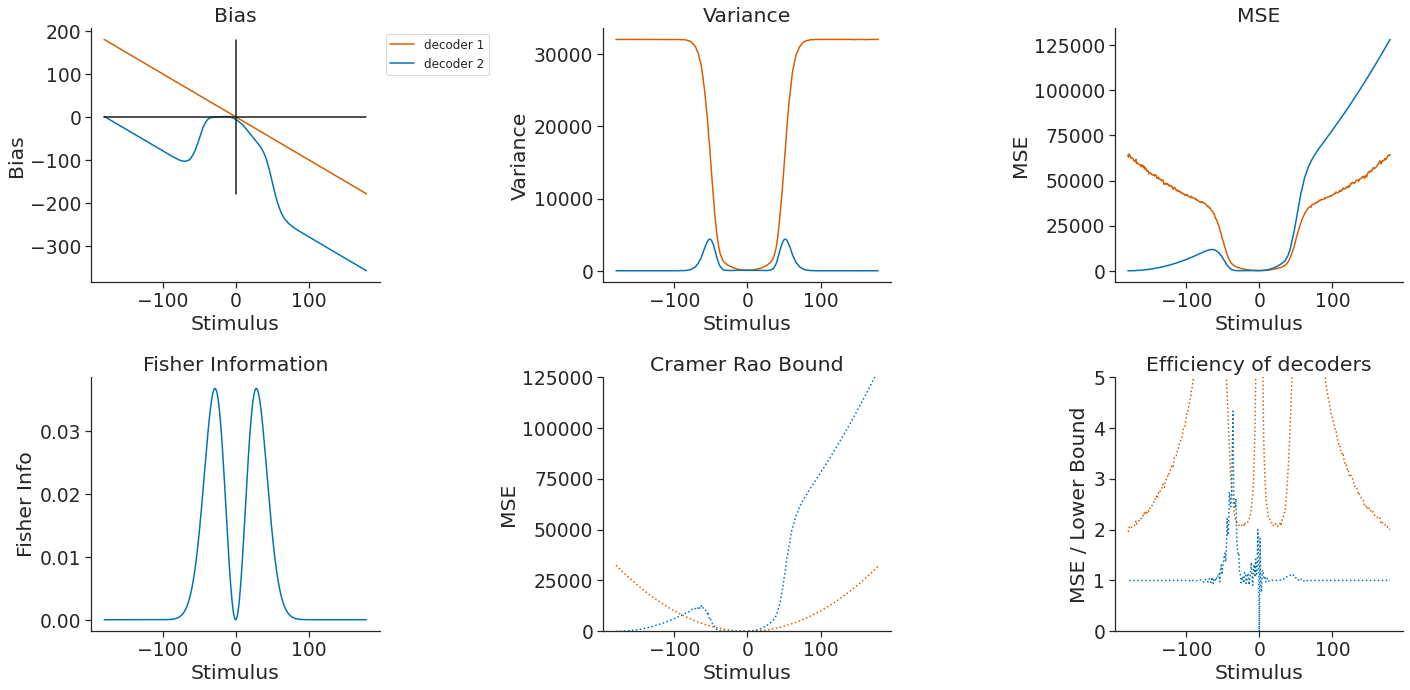

In [ ]:
FisherInfo = (s-spref)**2 * rmax * T/sigmaf**4 * np.exp(-(s-spref)**2/(2*sigmaf**2))

Ntrials = 10000


b1 = np.zeros([len(s)])
b2 = np.zeros([len(s)])
v1 = np.zeros([len(s)])
v2 = np.zeros([len(s)])
mse1 = np.zeros([len(s)])
mse2 = np.zeros([len(s)])

sdec1 = np.zeros([Ntrials,1])
sdec2 = np.zeros([Ntrials,1])


for ss in range(len(s)):  
    for t in range(Ntrials): 

        n = np.random.poisson(f[ss]);
        if n > rmax:
          sdec2[t] = spref
          sdec1[t] = spref
        elif n==0:
          sdec2[t] = s[1]  # 
          sdec1[t] = s[1] * (np.random.binomial(size=1, n=1, p = 0.5)-0.5) * 2  #
        else:
          sdec2[t] = spref - ((2*sigmaf**2)*(np.log(rmax) - np.log(n)))**0.5
          sdec1[t] = spref + ((2*sigmaf**2)*(np.log(rmax) - np.log(n)))**0.5 * (np.random.binomial(size=1, n=1, p = 0.5)-0.5) * 2 # randomly choose one or other solution
    
    #b1[ss] = np.mean(sdec1 - s[ss]) # numerical estimate
    b1[ss] = spref - s[ss] # analytical result, gives better numerical precision
    b2[ss] = np.mean(sdec2 - s[ss]) # numerical estimate
    #likelihood = np.zeros([T*rmax + 1])
    #for n in range(T*rmax+1):
    #  likelihood[n] = (T*f[ss] ) ** n * np.exp(-T*f[ss]) / np.math.factorial(n)
    #b2[ss] = spref - s[ss] - np.sum( likelihood * (2*sigmaf**2 * (np.log(T*rmax) * np.ones([T*rmax+1]) - np.log(range(T*rmax+1))))**0.5) # analytical result, gives better numerical precision
    v1[ss] = np.var(sdec1)
    v2[ss] = np.var(sdec2)
    mse1[ss] = np.mean( (sdec1 - s[ss])**2)
    mse2[ss] = np.mean( (sdec2 - s[ss])**2)


b1deriv = np.gradient(b1, axis=0) 
b2deriv = np.gradient(b2, axis=0)

CramerRao1 = (1+b1deriv)**2/FisherInfo + b1**2
CramerRao2 = (1+b2deriv)**2/FisherInfo + b2**2

fig, ax = plt.subplots(2,3,  figsize = (20,10))

ax[0,0].plot(s,b1, color='r', label='decoder 1')
ax[0,0].plot(s,b2, color='b', label='decoder 2')
ax[0,0].plot(s,0*s, color='k')
ax[0,0].plot(0*s,s, color='k')
ax[0,0].set_title('Bias')
ax[0,0].set_xlabel('Stimulus')
ax[0,0].set_ylabel('Bias')
ax[0,0].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 12)

ax[0,1].plot(s,v1, color='r')
ax[0,1].plot(s,v2, color='b')
ax[0,1].set_title('Variance')
ax[0,1].set_xlabel('Stimulus')
ax[0,1].set_ylabel('Variance')

ax[0,2].plot(s,mse1, color='r')
ax[0,2].plot(s,mse2, color='b')
ax[0,2].set_title('MSE')
ax[0,2].set_xlabel('Stimulus')
ax[0,2].set_ylabel('MSE')

ax[1,0].plot(s, FisherInfo)
ax[1,0].set_title('Fisher Information')
ax[1,0].set_xlabel('Stimulus')
ax[1,0].set_ylabel('Fisher Info')

ax[1,1].plot(s,CramerRao1, linestyle='dotted', color='r')
ax[1,1].plot(s,CramerRao2, linestyle='dotted', color='b')
ax[1,1].set_title('Cramer Rao Bound')
ax[1,1].set_xlabel('Stimulus')
ax[1,1].set_ylabel('MSE')
ax[1,1].set_ylim([0,125000])


ax[1,2].plot(s,mse1 / CramerRao1, linestyle='dotted', color='r')
ax[1,2].plot(s,mse2 / CramerRao2, linestyle='dotted', color='b')
ax[1,2].set_ylim([0,5])
ax[1,2].set_title('Efficiency of decoders')
ax[1,2].set_xlabel('Stimulus')
ax[1,2].set_ylabel('MSE / Lower Bound')

plt.tight_layout()
